In [14]:
# supress warnings
import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#somoclu is a python self organzing map library
import somoclu
%matplotlib inline 

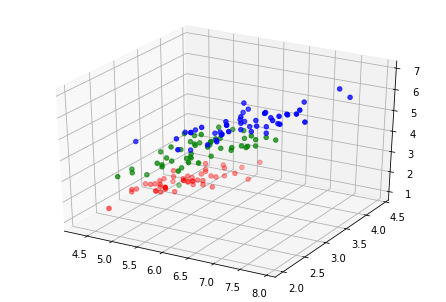

In [15]:
#c1 = np.random.rand(50, 3)/5
c1 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows = 50) 
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c2 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
c3 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 50)
#c4 = np.genfromtxt('submission/kohonen-maps/iris.csv', delimiter=',', usecols=(3))
data = np.float32(np.concatenate((c1, c2, c3)))
 
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(150)

In [16]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

Wall time: 2.29 s


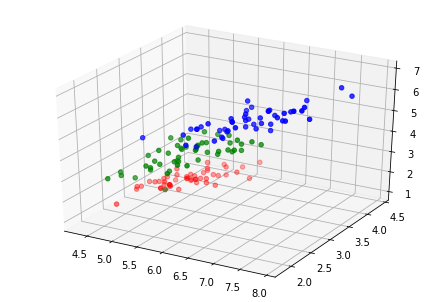

In [12]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c=colors)

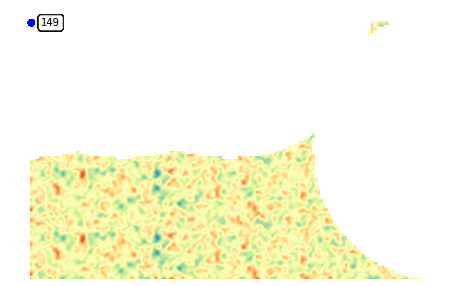

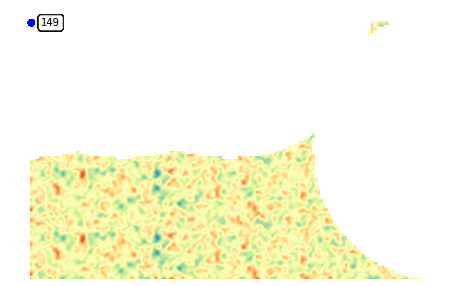

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [13]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=5, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)